<a href="https://colab.research.google.com/github/Marcozambeli/General/blob/main/Trabalho_3_EST_SE_Marco_Antonio_Zambeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ENE057A - Estabilidade em Sistemas Elétricos de Potência Módulos 2 e 3 - Fundamentos de Estabilidade Angular e Sistemas Multi-Máquinas

###Trabalho 3 - Marco Antonio de O. Zambeli 201369026c



###1) Seja o sistema radial mostrado na Figura 1, dotado de um gerador síncrono conectado a um sistema de grande porte, representado por um barramento infinito, através de um transformador elevador e duas linhas de transmissão em paralelo. As reatâncias mostradas no diagrama unifilar são dadas por unidade na base do gerador. Este sistema deve ter sua estabilidade transitória avaliada para a um curto-circuito (Xf = 0,01 p.u.) no iníıcio da LT 2 seguido da eliminação da falta através da abertura da mesma LT 2. Considerando o sistema operando em regime permanente nas condições indicadas abaixo, estime o tempo crítico de falta para o sistema. Empregue o modelo clássico para o gerador.

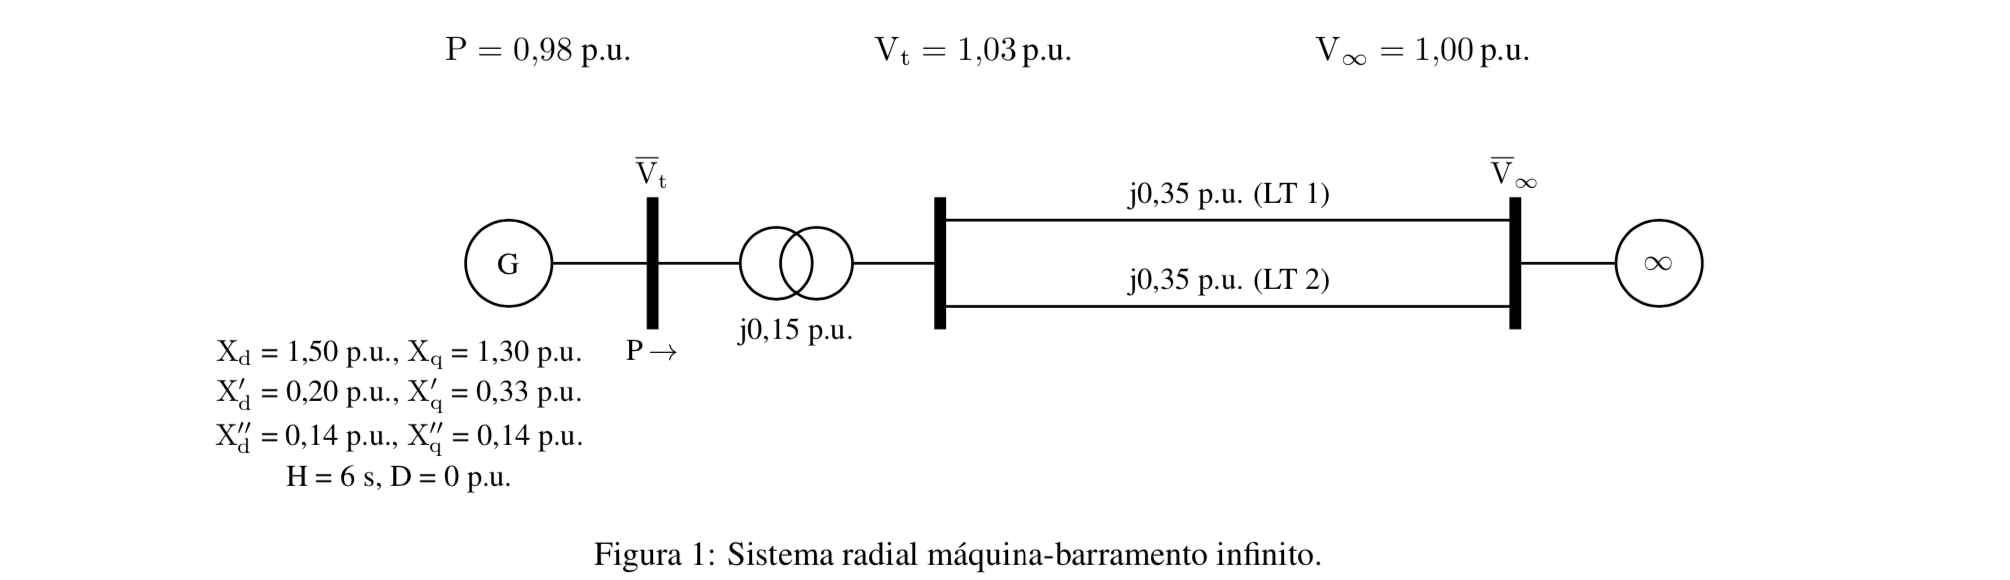

In [150]:
# 1º bloco de código para importar bibliotecas e declarar as variáveis do caso em análise:

import numpy as np
from scipy.integrate import solve_ivp
#import matplotlib.pyplot as plt
#import plotly.graph_objects as go
from scipy.optimize import root
import scipy.integrate as integrate
import math
import cmath



# Dados [pu]:
P = 0.98    
Vt = 1.03   
Vinf = 1   

f  = 60  #[Hz]

#Reatâncias do sistema:
Xf = 0.01   
Xl1 = 0.35  
Xl2 = 0.35
Xt = 0.15

# Reatâncias dos eixos direto e em quadratura [pu]
Xd =  1.5
X1d = 0.2
X2d = 0.14
Xq =  1.3
X1q = 0.33
X2q = 0.14

# Constantes de tempo de circuito aberto, em segundos
T1d0 = 7.8
T2d0 = 0.04
T1q0 = 2.5
T2q0 = 0.15

# Constante de inércia do eixo [s]
H = 6

# Constante de amortecimento [pu]
D = 0

# Resistência de armadura
Ra = 0

# Velocidade de rotação
wb = 2*np.pi*f 


####Resolução letra "a"
> A estabilidade transitória será analisada pautando-a no modelo clássico para sistemas multi-máquina. Em tal modelo simplificado, a saliência transitória da máquina é desconsiderada de forma que: 

  * $X'_d=X'_q$

> Para o modelo transitório clássico vale o seguinte modelo radial:

(colar aqui print do esquema radial)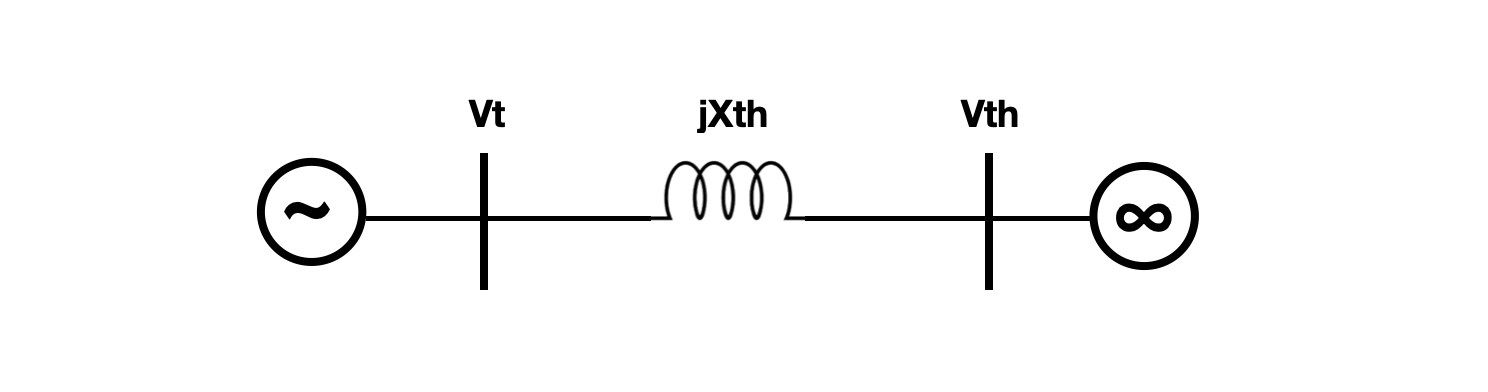

> Pela relação a seguir, observa-se as tensões terminais vistas pelo gerador e pela rede:

* $V_{TH}=E'-j(X'_q+X_{TH})I_q-j(X'_d+X_{TH})I_d$

> Simplificando em relação às reatâncias $X_d$ e $X_q$:

* $V_{TH}=E'-jX_{q}^{eq}I_q-jX_{d}^{eq}I_d$

> A potência elétrica transitória pode ser obtida através da equação:

* $P_e'=\frac{V_{TH}E_d'}{X_d^{eq}}cos(\delta)+\frac{V_{TH}E_q'}{X_d^{eq}}sen(\delta)-\frac{V_{TH}^2}{2}(\frac{1}{X_d^{eq}}-\frac{1}{X_q^{eq}})sen(2\delta)$

>E as equações de oscilação:


*   $\delta^.=w_bw$;
*   $2Hw^.=P_m-P_e(\delta)-Dw$
* $\delta(0)=\delta_0$
* $w(0)=0$

> Pelo modelo clássico $X_q'=X_d'$, tem-se as seguintes equações de $V_t$ e $P'_e(\delta)$:

* $V_t=E'-jX_q'I_q-jX_d'I_d=E'-jX'_dI_a$
* $P_e'(\delta)=\frac{V_{TH}E'}{X_d\cdotê_q}$





> Como o a tensão $V_t$ (pu) no gerador é conhecida, calcula-se o ângulo do fasor. Isso pode ser feito analisando a potência transferida entre o gerador e a barra infinita através de uma reatância equivalente como segue no esquema abaixo:

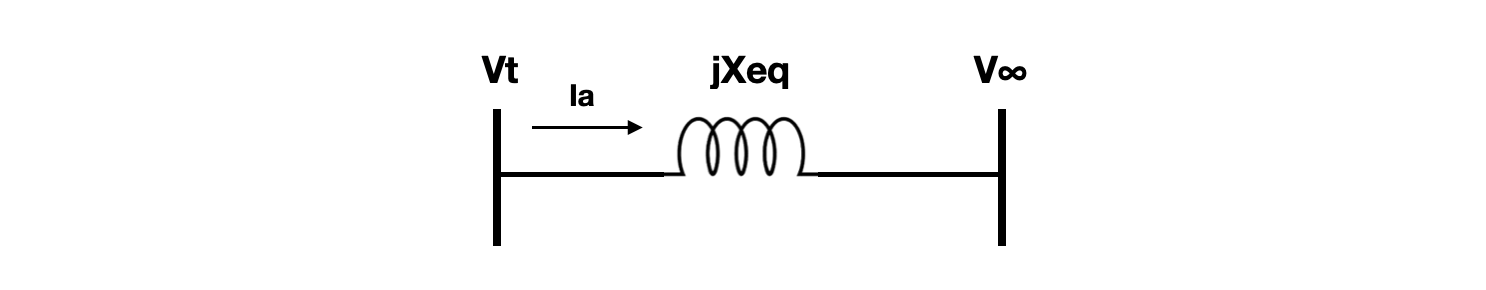(colar aqui print do circuito esquematico n2)

> A reatância equivalente pode ser calculada como se segue:

* $X_{eq}=X_t+\frac{X_{L1}\cdot X_{L2}}{X_{L1}+t X_{L2}}=0,15+\frac{0,35\cdot 0,35}{0,35+0,35}=0,325pu$

> A potência transferida por tal sistema, considerando $\theta1$ como ângulo de tensão no gerador e $\theta2$ como ângulo de tensão na barra infinita (nula), fica:
* $P=\frac{V_tV_{\infty}}{X_{eq}}sen(\theta1-\theta2)$

> Reescrevendo a relação para achar a variação de $\theta$

* $\theta=\theta1=arcsen(\frac{P.X_{eq}}{V_t.V_{\infty}})=arcsen(\frac{0,98.0,325}{1,03.1})=18,01º=0,31rad$

> Pela resultado da equação anterior, a fase da tensao terminal do gerador $V_t$ foi obtida ($\theta=18,01º=0,31rad$), a qual representa a defasagem entre as barras 1 e 3. Com isso, calcula-se a corrente $I_a$ no bloco de código a seguir:


In [151]:
# Declarando valores calculados analiticamente no bloco de textos acima:
Xeq = 0.325   #[pu]
theta = 0.31  #[0,31]

# Cálculo de Ia:
Ia = ((cmath.rect(Vt,theta))-Vinf)/complex(0,Xeq)

print("O valor da corrente Ia é",Ia)

O valor da corrente Ia é (0.966801217036144+0.058758224669892896j)


> Os esquemas abaixo, que demonstram o gerador síncrono simplificado(modelo clássico) e a distância angular entre a tensão no barramento infinito e a tensão $E'$. O primeiro será usado para o cálculo da tensão transitória $E'$.

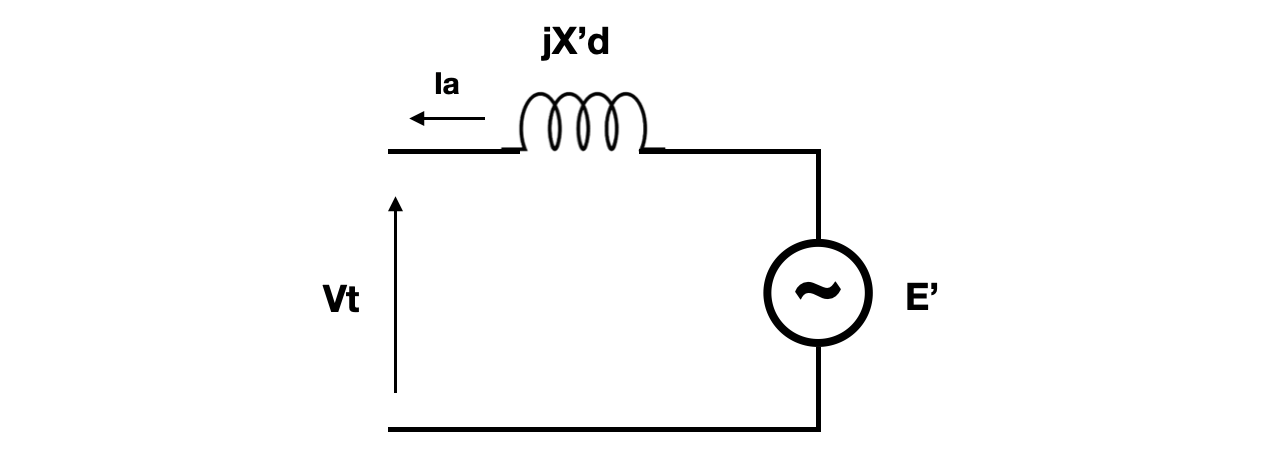

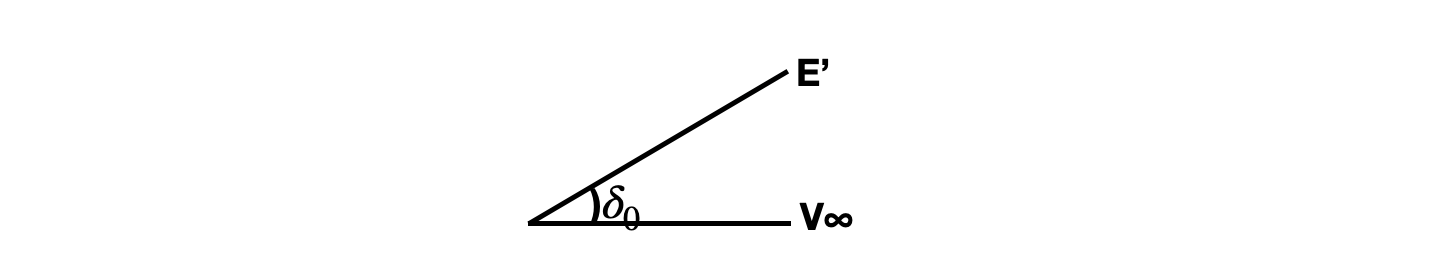


In [152]:
# Cálculo de E':
Vtret = cmath.rect(Vt,theta)
E1ret = Vtret + (complex(0,X1d))*Ia # Representação retangular de E1 para controle

E1 = complex(Vt,theta) + (1j*X1d*Ia)
#E1 = Ia * complex(0,X1d) + Vt
delta0 = cmath.phase(E1) #rad entre E' e Vinf
print("A tensão transitória é de ([pu],[rad]):",E1)
delta0



A tensão transitória é de ([pu],[rad]): (1.0182483550660215+0.5033602434072288j)


0.4591088537468094

>No atual instante as condições iniciais da máquina podem ser encontradas. Já se sabe os valores de  $\delta_0, E' , I_a$.

> Visando a aplicação do critério das áreas iguais, serão calculados os valores de potência pré, durante e após a falta. Como a condição é a de falta é um curto-circuito no inicio da LT2:

>**Cálculo da potência pré-falta:**

>Aqui é considerado que a reatância equivalente obtida através da associação em série entre transformador e linhas em paralelo, onde são válidas as equações de análise:

* $X_{TH}^{pre}=X_T+\frac{X_{LT}}{2}$;
* $X_d^{pre}=X'_d+X_{TH}^{pre}$;
* $P_e^{pre}(\delta)=\frac{E'.V_{\infty}}{X_d^{pre}}sen(\delta)$.

> Nesse caso, a Potência elértrica deve ser a mesma que a mecânica ao usar o angulo $\delta_0$ da condição inicial.

* $P_m=\frac{V_{\infty}|E'|sen(\delta_0)}{X_{eq}+X'_d}$


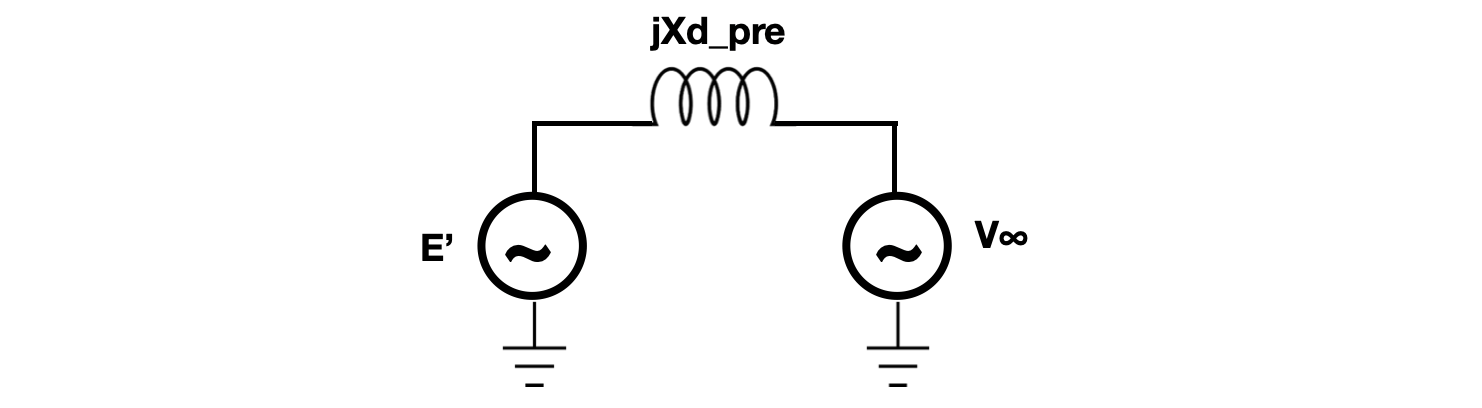

In [153]:
#Bloco de código para o pré-falta
Xlt = 0.35
Xthpre = Xt + Xlt/2
Xdpre = X1d + Xthpre
def Pe_pre(delta):
  return (abs(E1)*Vinf)/abs(Xdpre) * np.sin(delta)

Pepre = (abs(E1)*Vinf/Xdpre)*math.sin(delta0)             #para delta0 nas cond iniciais
print(Pepre)
Pm = Vinf*abs(E1)*math.sin(delta0)/(Xeq+X1d)
print(Pm)
print("assim, observa-se que Pepre e Pm são iguais,iguais também à potência do gerador quando resistência do sistema é nula ")

0.9587814160137693
0.9587814160137692
assim, observa-se que Pepre e Pm são iguais,iguais também à potência do gerador quando resistência do sistema é nula 


>**Cálculo da potência durante-falta**

>O seguinte diagrama de impedâncias permite o cálculo do equivalente Thevenin visto pelos terminais da máquina:

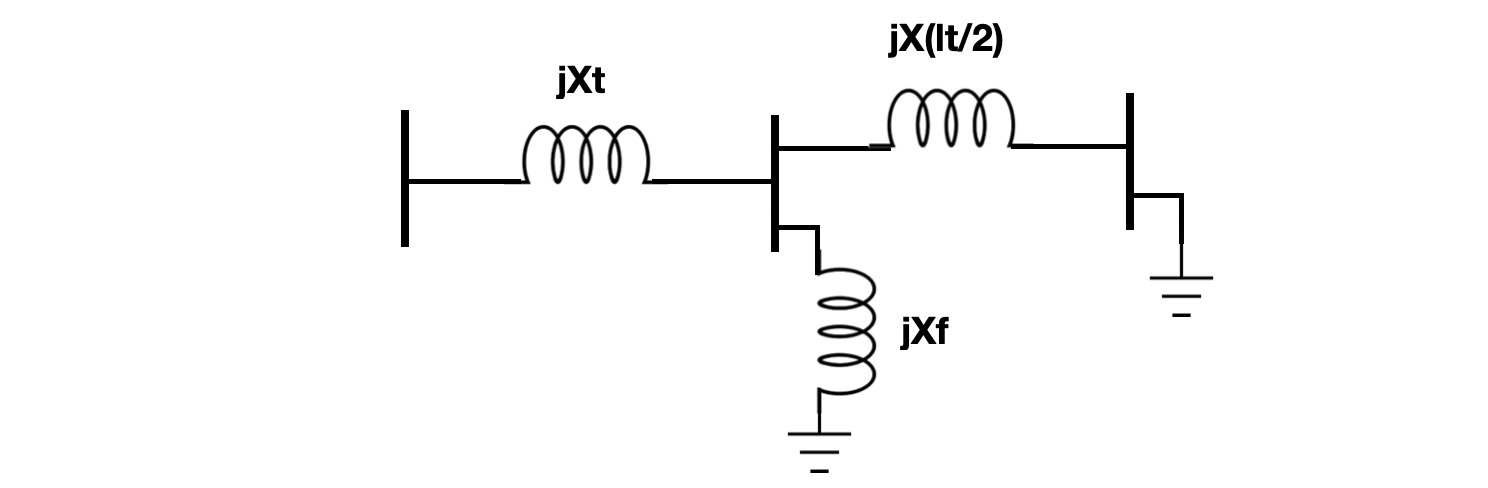

>Onde:


*   jXf é a falta;
*   jX(lt/2) equivale às linhas de transmissão em paralelo.

> Curto-circuitando o gerador para o cálculo do Thevenin, tem-se que a impedância de Thevenin é obtida através de:

* $Z_{TH}=jX_t+ \frac{jX_f.\frac{jX_t}{2}}{jX_f+\frac{jX_t}{2}}=jX_{TH}^{dur}$

> Assim, o $X_d$ visto da máquina é:

* $X_d^{dur}=X'_d+X_{TH}^{dur}$





In [154]:
# Bloco de código para cálculos durante falta
Zth = complex(0,Xt)+((complex(0,Xf)*complex(0,Xt/2))/(complex(0,Xf)+complex(0,Xt/2)))
Xthdur = abs(Zth)
Xddur = X1d + Xthdur

print("Valor de Xd durante a falta [pu] é:",Xddur)

Valor de Xd durante a falta [pu] é: 0.3588235294117647


> Seguindo para o cálculo da tensão de Thevenin ($Vth$), o curto do circuito acima é substituido pela tensão do barramento infinito. Assim, a tensão vista pelos terminais é justamente a tensão em cima da falta (em $jXf$), uma vez que não existe corrente passando por $jXt$. Com isso, expressão fica:

* $ V_{TH}=\frac{jX_f}{j(X_f+\frac{X_{LT}}{2})}*V_{\infty} $

> Elimina-se $j$ da equação acima para revelar que a tensão de Thevenin possui a mesma fase do barramento infinito. Assim, chega-se em uma expressão para a potência elétrica durante a falta:

* $P_e^{dur}(\delta)=\frac{E'.V_{TH}}{X_d^{dur}}sen(\delta)$



In [155]:
Vth = (Xf/(Xf+Xlt/2))*Vinf
# Pedur = (abs(E1)*Vth/Xddur)*math.sin(delta)
def Pe_dur(delta):
  return (abs(E1)*Vth)/abs(Xddur) * np.sin(delta)
print("Tensão de Thevenin em pu é:",Vth)

Tensão de Thevenin em pu é: 0.05405405405405406


> **Cálculo da potência no pós-falta**

> Para tal análise, será desconsiderado o efeito do curto-circuito. Desse modo, a LT2 será retirada da análise. O circuito equivalente radial para essa situação se encontra na forma equivalente Thevenin. Por consequência, a tensão de Thevenin é a mesma da barra infinita.


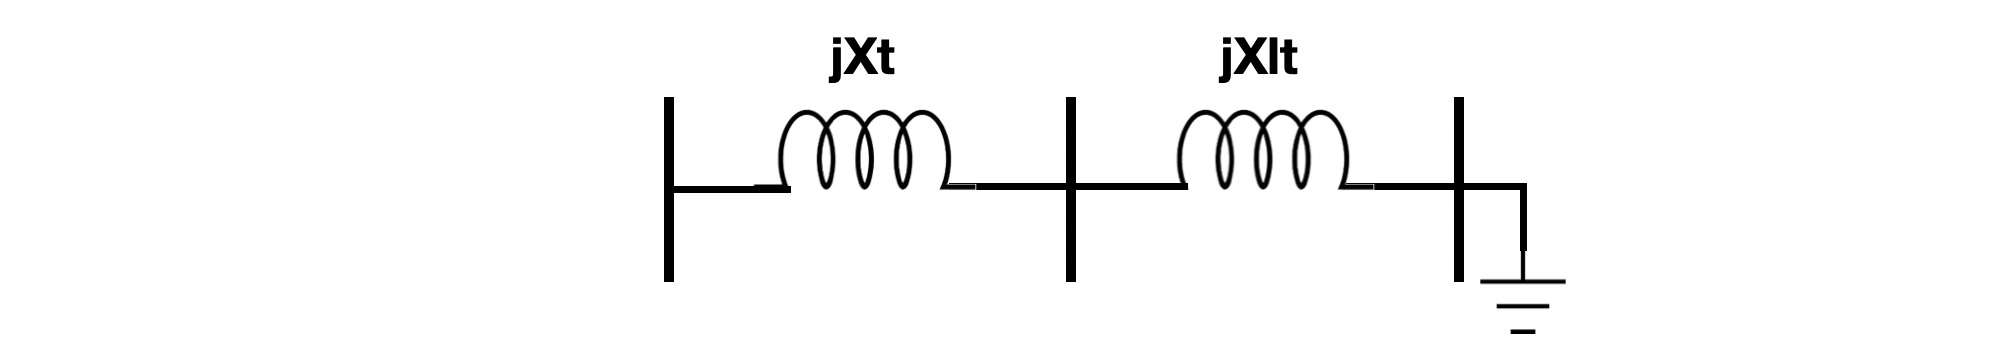

>De tal modo, valem as relações:

* $X_{TH}^{pos}=X_T+X_{LT}$;
* $X_d^{pos}=X'_d+X_{TH}^{pos}$.
* $V_{TH}=V_{\infty}$

> E a potência elétrica e mecânica pode ser expressa como:

* $P_e^{pos}(\delta)=\frac{E'.V_{\infty}}{X_d^{pos}}sen(\delta)$
* $P_m=P_e^{pos}(\delta_1)=P_{max}sen(\delta1)$

In [156]:
# Bloco de código para cálculos após a falta
Xthpos = Xt + Xlt
Xdpos = X1d + Xthpos
Vth2 = Vinf
print("Xthpos = %s, Xdpos = %s" % (Xthpos,Xdpos))

def Pe_pos(delta):
  return (abs(E1)*Vinf)/abs(Xdpos) * np.sin(delta)
#Pepos = ((abs(E1)*Vinf)/abs(Xdpos))*math.sin(delta1)


Xthpos = 0.5, Xdpos = 0.7


> De posse das potências durante e após a falta, são obtidas as potências acelerantes nestas condições, bem como as áreas de aceleração e desaceleração e o consequente ângulo $\delta_{crit}$:

* $A_1(δ_0, δ_{crit}) = A_2(δ_{crit},δ_1)$

> Calcula-se ainda as áreas de aceleração e desaceleração para o sistema com base na potência acelerante :

* $P_a(δ) = P_{mec} - P_e^{trans}(δ)$

>**Área de aceleração** é referenteà potência durante a falta:

* $P_a^{dur} = P_{mec} - P_e^{dur}$  

>**Área de desaceleração**é referente à potência pós-falta:

* $ P_a^{pos} = P_{mec} - P_e^{pos}$

In [157]:
# Bloco de códico final para pot acelerante e relação entre áreas 
# Potência acelerante durante a falta
def Pa_dur(delta):
  return Pm - Pe_dur(delta)

# Potência acelerante após a falta
def Pa_pos(delta):
  return Pm - Pe_pos(delta)

sol1 = root(Pa_pos, x0=np.pi)  #ang carg max
delta1 = sol1.x[0]

#print(" Ângulo de carga máximo δ1=",delta1)

# Área de aceleração:
def A1(delta):
  return integrate.quad(Pa_dur, delta0, delta)[0]

# Área de desaceleração:
def A2(delta):
  return integrate.quad(Pa_pos, delta, delta1)[0]

# Relacionando A1 e A2 pelo critério das áreas iguais: 
def CAE(delta):
  return A1(delta) + A2(delta)

# ângulo crítico
sol_cae = root(CAE, x0=(delta0+delta1)/2)
deltacrit = sol_cae.x[0]
print(" Ângulo de carga crítico δcrit =", deltacrit)

 Ângulo de carga crítico δcrit = 1.2166949871800572


> Como objetivo final, pode-se calcular o **tempo crítico** lançando mão das equações de oscilação da máquina para descobrir a variação o ângulo $\delta$ no tempo:

* $\frac{d\delta}{dt} = \frac{P_mw_bt}{2H}$
* $\frac{d\delta}{dt} =\delta_0 + \frac{P_mw_bt}{4H}$
* $\delta(t) = \delta_0 + \frac{P_m \cdot w_b \cdot t^2}{2H}$

> E o tempo crítico:

* $t_{cr}=\sqrt{\frac{4H(\delta_{crit}-\delta_0)}{P_mw_b}} $




In [158]:
#Bloco final para a obtenção do tempo crítico
tcrit = math.sqrt((4*H*(deltacrit - delta0))/(Pm*wb))
tcrit = 1000*tcrit
print(f" Com isso, tem-se um tempo crítico em [ms] de:",tcrit)

 Com isso, tem-se um tempo crítico em [ms] de: 224.28295331230785


###2) Seja o sistema com duas usinas mostrado na Figura 2. As reatâncias mostradas no diagrama unifilar são dadas por unidade na base de 100 MVA. O sistema sofre um curto-circuito trifásico franco próximo à barra 2 que é eliminado através da abertura da linha 2 – 3. Considerando modelos transitórios clássicos para os geradores e o sistema operando em regime permanente na condição pré-falta indicada, responda as seguintes questões:

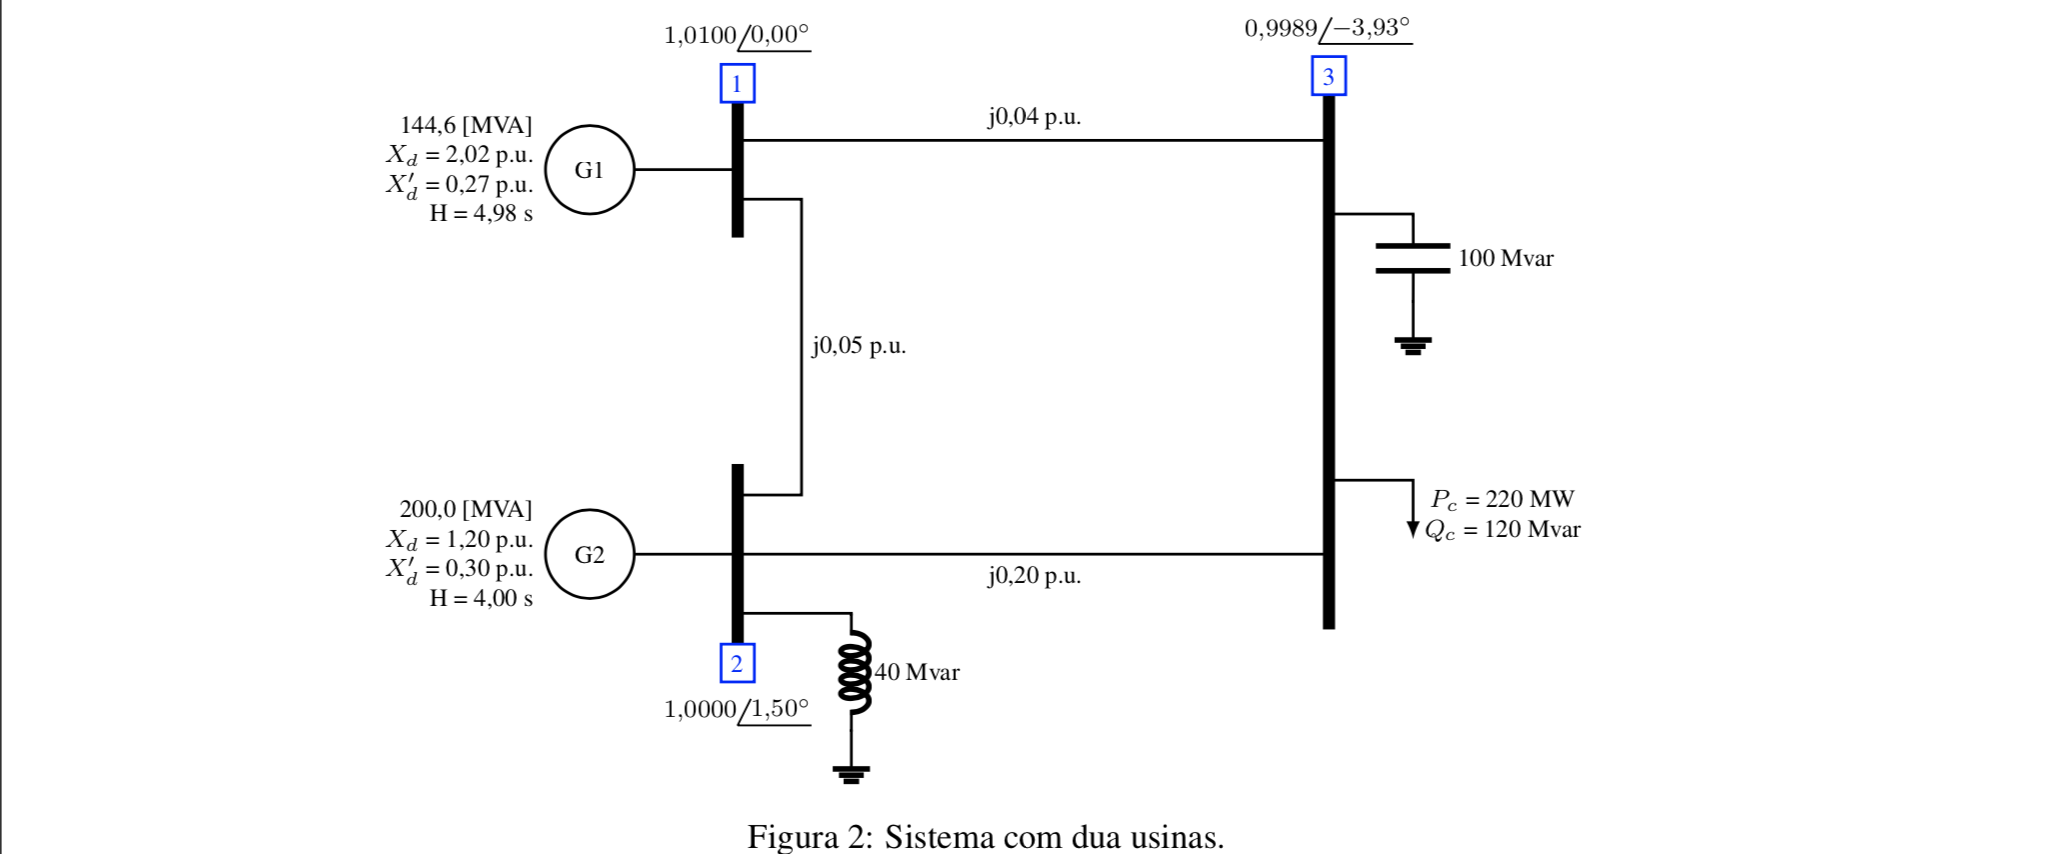


###(a) Calcule as potências ativa e reativa produzidas em cada um dos geradores equivalentes.

###(b) Calcule as tensões internas transitórias dos geradores em módulo e ângulo.


###(c) Calcule as admitâncias representativas da carga, do banco de capacitores e do banco de reatores.


###(d) Calcule a matriz de admitâncias do sistema pós-falta, incluindo todas as barras de rede e as internas das máquinas.

###(e) Calcule as expressões da potência elé́trica transitória dos geradores equivalentes em função do ângulo relativo δ12 para a condição pós-falta.